In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd    # digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt   # digunakan untuk visualisasi data
import seaborn as sns   # juga digunakan untuk visualisasi data



from sklearn.model_selection import(   # digunakan untuk validasi silang dan hyperparameter tuning
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)


import math
import warnings



import time




import pickle
import re
import datasets
import pyarrow.feather as feather
import pandas as pd


from datasets import load_dataset
import pyarrow as pa
import pyarrow.parquet as pq
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
import nltk
from nltk.tokenize import word_tokenize
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import sys
sys.path.append('/content/indonlu')
from transformers import  BertConfig, BertTokenizer,BertForSequenceClassification


import torch
from torch import optim


import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

# NLP
import nltk
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# # Viz
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib as mpl
# from wordcloud import WordCloud

# #Model IndoBERT
# import random
# import torch
# import torch.nn.functional as F
# from torch import optim
from tqdm import tqdm

# from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
# from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
# from indonlu.utils.forward_fn import forward_sequence_classification
# from indonlu.utils.metrics import document_sentiment_metrics_fn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import torch

In [ ]:

path = r"/content/drive/MyDrive/label_manual_fix_updated.csv"


In [ ]:
data=pd.read_csv(path)
data.head()

,text,sentimen
0,@unmagnetism Menyetop hilirisasi nikel,2
1,@PEJOEANG17845 @Kaum__Jelata @alextham878 @Lem...,1
2,@hendrikk168 @yusuf_dumdum Sberapa sih besarny...,0
3,@Fahrihamzah Hilirisasi...uangnya hnya sdikit ...,0
4,@hendrikk168 @savicali Yakiiin hasil hilirisas...,0


In [ ]:
data['sentimen'] = data['sentimen'].astype(int)

In [ ]:
# def change_label(x) :
#     if x=='positif' :
#         return 2
#     elif x=='negatif' :
#         return 0
#     elif x=='netral' :
#         return 1

In [ ]:
# data['sentimen']=data['sentimen'].apply(lambda x: change_label(x))

In [ ]:
data.head()

,text,sentimen
0,@unmagnetism Menyetop hilirisasi nikel,2
1,@PEJOEANG17845 @Kaum__Jelata @alextham878 @Lem...,1
2,@hendrikk168 @yusuf_dumdum Sberapa sih besarny...,0
3,@Fahrihamzah Hilirisasi...uangnya hnya sdikit ...,0
4,@hendrikk168 @savicali Yakiiin hasil hilirisas...,0


In [ ]:
data.reset_index(drop=True, inplace=True)
data.tail()

,text,sentimen
5897,@sosmedkeras Emang paling benar dah tunggu tay...,2
5898,Ok gas ok gas ok gas Pak Teruskan bohongnya tt...,0
5899,Divestasi 14% Saham Disepakati INCO Tancap Gas...,1
5900,@VIVAcoid Limbah hilirisasi nikel di Indonesia...,0
5901,Apakah xi jin ping akan makin berkibar di Indo...,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
emoji_df = pd.read_csv("/content/drive/MyDrive/emoji_to_text.csv")
emoji_dict = dict(emoji_df.values)

In [ ]:
def replace_emojis(text, emoji_dict):
    # Create a regex pattern that matches any of the emojis in the dictionary
    emoji_pattern = re.compile("|".join(re.escape(key) for key in emoji_dict.keys()))

    # Define a function that will be used for replacement
    def replace_match(match):
        return emoji_dict[match.group(0)]

    # Use re.sub to replace the emojis with their text
    return emoji_pattern.sub(replace_match,text)

In [ ]:
import re

def preprocessing(text):
    text=text.lower()
    patterns = {
        'retweet' : [r'^rt\s+@\w+\s?:?'],
        'punctuation': [r'[^a-zA-Z0-9\s]'],
        'urls': [
            r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),…]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
            r'www[.](?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),…]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
            r'(?i)\b((?:http[s]?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.])(?:com|net|id|org|info|co)(?:[…/$-_@.&+!*=?]|[0-9a-zA-Z]|[0-9a-zA-Z])+)',
        ],
        'hashtags': [r'(?i)\#\w+'],
        'tags': [r'(?i)\@\w+'],
        'emojis': [re.escape(e) for e in Emoji_Dict.keys()],
        'symbols': [r'[^\w\s]']
    }
    for pattern in patterns['retweet']:
        text = re.sub(pattern, '', text)
    for pattern in patterns['punctuation']:
        text = re.sub(pattern, '', text)
    pattern = re.compile(r'[^\w\s]')
    text=re.sub(pattern,'',text)
    for i in patterns.values() :
        for j in i :
            text=re.sub(j,'',text)

    return re.sub(r'\s+', ' ', text).strip()


In [ ]:
import random
def generate_texts(data,num) :
    picks=[]
    for i in range(num) :
        randoms=random.randint(0,len(data))
        picks.append(randoms)
    return data.loc[picks]



In [ ]:
excluded_stopwords = [
    "tidak",
    "bukan",
    "jangan",
    "tak",
    "belum",
    "tidak ada",
    "tidak pernah",
    "justru",
    "malah",
    "hanya",
    "saja",
    "sungguh",
    "amat",
    "terlalu",
    "benar-benar",
    "sangat",
    "sekali",
    "ternyata",
    "tadinya",
    "bahwa",
    "apabila",
    "jika",
    "jikalau",
    "seandainya",
    "sekiranya",
    "sejak",
    "semenjak",
    "sewaktu",
    "sebelum",
    "sesudah",
    "selesai",
    "ketika",
    "kemudian",
    "setelah",
    "sementara",
    "begitu",
    "demikian",
    "seperti",
    "serupa",
    "mirip",
    "sama",
    "seolah-olah",
    "akan",
    "mau",
    "mesti",
    "harus",
    "perlu",
    "patut",
    "boleh",
    "dapat",
    "bisa",
    "mampu",
    "sebaiknya",
    "seharusnya",
    "sempat",
    "tahu",
    "tahulah",
    "ketahui",
    "tandanya",
    "yaitu",
    "adalah",
    "namun",
    "ga"
]


In [ ]:
pip install Sastrawi

In [ ]:
import json
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import nltk

# Menggunakan kamus kata gaul Salsabila
kamus_alay=pd.read_csv("/content/drive/MyDrive/colloquial-indonesian-lexicon.csv")
# Rekonstruksi data sebagai 'dict'
slang_mapping = dict(zip(kamus_alay['slang'], kamus_alay['formal']))
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# List of words with negation meaning


# Remove negation words from stopwords
stopwords = set(stopwords).difference(excluded_stopwords)
nlp = Indonesian()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def processTweet(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Convert @username to AT_USER
    tweet = re.sub(r'\bvia @\w+\b', '', tweet)
    tweet = re.sub(r'\brt @\w+\b', '', tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    tweet=re.sub(r'\d+', '', tweet)
    #trim
    tweet = tweet.strip('\'"')
    tweet = tweet.lstrip('\'"')
    tweet = "".join([char for char in tweet if char not in string.punctuation])

    tokens = tweet.split()

    # Replace slang words in the tokens with formal words
    tweet = " ".join(slang_mapping.get(ele, ele) for ele in tokens)

  # Tokenisasi teks menggunakan word_tokenize dari NLTK

    doc = nlp(tweet)
    tokens = [token.text for token in doc]

    # Inisialisasi factory untuk pembuatan objek StopWordRemover

    # Hapus stopwords dari tokens
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    tweet = ' '.join(filtered_tokens)

    tweet=stemmer.stem(tweet)

    return tweet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical



In [ ]:
data.iloc[3:4,:1]['text'].values[0]

'@Fahrihamzah Hilirisasi...uangnya hnya sdikit yg msuk indonsia....krn adanya bebas pjk prushaan d pkrja ( china nikel)'

In [ ]:
processTweet(data.iloc[5090:5091,:1]['text'].values[0])

'faisal basri sebut industri nikel rugi indonesia kira persen untung nikmat cina'

In [ ]:
def testing(data,n) :
    frame=generate_texts(data,n)
    index=frame.index.values.tolist()
    cleaned=[]
    for i in frame['text'] :
        cleaned.append(processTweet(i))
    frame['cleaned']=cleaned
    frame.drop('sentimen',axis=1,inplace=True)


    return frame

In [ ]:
pd.set_option('display.max_colwidth', None)
testing(data,10)

,text,cleaned
3687,@DutaTamaSports Setuju banget dengan adanya larangan ekspor nikel mentah merupakan langkah penting untuk peekembangan sektor industri #Gibr4nLanjutkanJKW MasGibra4n PenerusJKW,tuju banget ada larang ekspor nikel mentah rupa langkah penting peekembangan sektor industri masgibran penerusjkw
949,@tempodotco lu @gibran_tweet taunya cuman hilirisasi nikel toh?,lu tau cuman hilir nikel
3948,Keberhasilan Ganjar-Mahfud dalam menjalankan kebijakan hilirisasi membuktikan bahwa mereka memahami potensi Indonesia dengan baik. @NurrahmaAnnaza Happy New Year #GanjarMahfud2024 #GanjarMahfudM3nang #L3bihbaik https://t.co/0QnOAmmNUO,hasil ganjarmahfud jalan bijak hilir bukti bahwa paham potensi indonesia baik happy new year
4414,Kebijakan hilirisasi akan membawa manfaat berupa peningkatan nilai tambah produk peluang kerja dan pertumbuhan ekonomi yang berkelanjutan untuk kesejahteraan rakyat Indonesia. #HilirisasiJalanTerus https://t.co/0czfGvDxdO,bijak hilir akan bawa manfaat upa tingkat nilai tambah produk peluang kerja tumbuh ekonomi lanjut sejahtera rakyat indonesia
5010,Ekonom Mohammad Faisal mengungkapkan kebijakan hilirisasi mulai memberikan manfaat positif terhadap neraca perdagangan Indonesia. https://t.co/vOZQkdA5HM #InvestorDaily #Keuangan #Investor,ekonom mohammad faisal ungkap bijak hilir mulai beri manfaat positif neraca dagang indonesia
4355,Kebijakan hilirisasi akan meningkatkan nilai tambah produk dalam negeri menciptakan lapangan kerja dan meningkatkan kesejahteraan rakyat Indonesia. #HilirisasiJalanTerus https://t.co/ZLlLArMGtY,bijak hilir akan tingkat nilai tambah produk negeri cipta lapang kerja tingkat sejahtera rakyat indonesia
4395,Kebijakan hilirisasi akan membawa manfaat berupa peningkatan nilai tambah produk Indonesia menciptakan lapangan kerja dan meningkatkan kesejahteraan masyarakat. #HilirisasiJalanTerus https://t.co/thcNIruYD3,bijak hilir akan bawa manfaat upa tingkat nilai tambah produk indonesia cipta lapang kerja tingkat sejahtera masyarakat
2115,Kurang koordinasi atau emang substansinya sukar dipahami ya? #cakimin #gibran #muhaiminiskandar #debatcawapres #cawapres2024 #pilpres2024 #nikel #hilirisasi #lfp #pinterpolitik #infografis #politikindonesia #beritapolitik https://t.co/YIOfr145dC,kurang koordinasi memang substansi sukar paham
3897,@anak_tambang12 Mestinya kpud nya mengantisipasi banyak nya pemilih yg ktp nya dari luar daerah disana ada industri nikel yg sebagian pekerjanya masih ber-ktp daerah asalnya.,mesti kpud nya antisipasi banyak nya pilih ktp nya luar daerah sana industri nikel bagi kerja berktp daerah asal
675,Atau karna eropa takut pragib bakal nerusin program hilirisasi nikel yg merugikan eropa,eropa takut pragib bakal terus program hilir nikel rugi eropa


In [ ]:
data_cleaned_fix=data.copy()
data_cleaned_fix['cleaned_tweet']=data['text'].apply(lambda x: processTweet(x))

In [ ]:
data_cleaned_fix.to_csv('cleaned_tweet_fix.csv',index=False)

In [ ]:
data_cleaned_fix

,text,sentimen,cleaned_tweet
0,@unmagnetism Menyetop hilirisasi nikel,2,setop hilir nikel
1,@PEJOEANG17845 @Kaum__Jelata @alextham878 @Lembayung071 @ignasbowo @Minietweets_ @mpoklela7 @bengkeldodo @P4P4B0W0_2024 @Chaves1305 @Kimberley_2024 Justru itu #PrabowoGibran2024 berniat mewujudkan sila ke 5 Hilirisasi adalah Kunci. Hilirisasi Nikel yg belum maksimal saja Indonesia dapat di atas 400T/th Pdhal akan ada 21 bahan mentah yg akan di hilirisasi Kaya raya Indonesia gak pake lama Hanya @prabowo yg mampu kawal itu,1,justru niat wujud sila hilir adalah kunci hilir nikel belum maksimal saja indonesia dapat atas teteh padahal akan bahan mentah akan hilir kayak raya indonesia enggak pakai lama hanya mampu kawal
2,@hendrikk168 @yusuf_dumdum Sberapa sih besarnya hasil hilirisasi nikel ? Yg katanya 17 T jd 510 T itu ? Yakin pendapatan negara jd sgitu ? 510 T itu 17% APBN 3rb T loh tp anehny APBN sbelum ssudah hilirisasi tetap defisit 300-450T tiap thn utang buat nutup defisit yakin hasil nikel sgitu ?,0,sberapa sih besar hasil hilir nikel kata t jadi t yakin dapat negara jadi sgitu t apbn ribu t loh anehny apbn belum ssudah hilir tetap defisit t tiap tahun utang buat nutup defisit yakin hasil nikel sgitu
3,@Fahrihamzah Hilirisasi...uangnya hnya sdikit yg msuk indonsia....krn adanya bebas pjk prushaan d pkrja ( china nikel),0,hilirisasiuangnya hanya sdikit masuk indonsiakrn ada bebas pjk prushaan pkrja china nikel
4,@hendrikk168 @savicali Yakiiin hasil hilirisasi sgituu? Katanya dr nikel 17 T naik ke 510T itu setara 17% apbn 3000 T tp knpa apbn defisit terus namplangi dr utang lg Tiap tahun defisit lbh dr 300-450T sbelum hilirisasi defisit ya sgitu stlah hilirisasi tetep defisit malah tren nya naek aneh kan ?,0,yakiiin hasil hilir sgituu kata nikel t naik t tara apbn t apbn defisit terus namplangi utang tiap tahun defisit lebih t belum hilir defisit sgitu stlah hilir tetap defisit malah tren nya naik aneh kan
...,...,...,...
5897,@sosmedkeras Emang paling benar dah tunggu tayang di netflix ajah,2,memang paling benar deh tunggu tayang netflix saja
5898,Ok gas ok gas ok gas Pak Teruskan bohongnya ttg hilirisasi nikel smp 6 bulan lagi. Itu juga kl smp 6 bulan Wkwkwk,0,gas gas gas pak terus bohong hilir nikel bulan kalo bulan wkwkwk
5899,Divestasi 14% Saham Disepakati INCO Tancap Gas Garap 3 Proyek Hilirisasi Nikel https://t.co/empuVl2FID #Emiten,1,divestasi saham pakat inco tancap gas garap proyek hilir nikel
5900,@VIVAcoid Limbah hilirisasi nikel di Indonesia nggak dikecam juga?,0,limbah hilir nikel indonesia enggak kecam


## IndoBert LSTM

In [ ]:
data_cleaned_fix=pd.read_csv('/content/cleaned_tweet_fix.csv')

In [ ]:
data_cleaned_fix.drop('text',axis=1,inplace=True)

In [ ]:
data_cleaned_fix['label']=data_cleaned_fix['sentimen']

In [ ]:
data_cleaned_fix.drop('sentimen',axis=1,inplace=True)

In [ ]:
data_cleaned_fix['label']=data_cleaned_fix['label'].replace({1:'neutral',2:'positive',0:'negative'})

In [ ]:
data_cleaned_fix.head(10)
data_cleaned_fix.dtypes


cleaned_tweet    object
label            object
dtype: object

In [ ]:
# Contoh konversi nilai teks ke angka
mapping = {'neutral': 0, 'positive': 1, 'negative': -1}

# Pastikan untuk mengganti 'neutral', 'positive', dan 'negative' dengan nilai yang ada di kolom label Anda
data_cleaned_fix['label'] = data_cleaned_fix['label'].map(mapping)

# Setelah pemetaan selesai, konversi tipe data menjadi int
data_cleaned_fix['label'] = data_cleaned_fix['label'].astype(int)

In [ ]:

X = np.array(data_cleaned_fix['cleaned_tweet'].values.tolist())
y = np.array(data_cleaned_fix['label'].values.tolist())

# train val split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)
# val_set, test_set = train_test_split(val_set, test_size=0.2, stratify=val_set.label, random_state=1)
# train_set.to_csv('train_set.tsv', sep='\t', header=None, index=False)
# val_set.to_csv('val_set.tsv', sep='\t', header=None, index=False)
# test_set.to_csv('test_set.tsv', sep='\t', header=None, index=False)

In [ ]:
className = {
    0: 0,
    1: 1,
    2: 2
}

def oneHotEncode(listArray):
    s = (len(listArray), len(np.unique(listArray)))
    tempData = np.zeros(s)
    for i in range(len(listArray)):
        if listArray[i] == 1:
            tempData[i][1] = 1
        elif listArray[i] == -1:
            tempData[i][0] = 1
    return tempData

In [ ]:
import tensorflow as tf
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
y_test_series = pd.Series(y_test.argmax(axis=1))
y_test_series.value_counts()

2    405
1    388
0    388
Name: count, dtype: int64

In [ ]:
# y_test[0].value_counts()

In [ ]:
# Setup text vectorization variables
from tensorflow.keras.layers import TextVectorization
max_vocab_length = 350 # max number of words to have in our vocabulary
max_length = 100
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(X)

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(
    input_dim=max_vocab_length, # set input shape
    output_dim=128, # set size of embedding vector
    embeddings_initializer="uniform", # default, intialize randomly
    input_length=max_length
) # how long is each input

In [ ]:
import tensorflow.keras.preprocessing.sequence as sequence
from tensorflow.keras.preprocessing.text import Tokenizer
max_fatures = 2000
# train val split
train_set, val_set = train_test_split(data_cleaned_fix, test_size=0.2, stratify=data_cleaned_fix.label, random_state=1)
val_set, test_set = train_test_split(val_set, test_size=0.1, stratify=val_set.label, random_state=1)

print(f'Train shape: {train_set.shape}')
print(f'Val shape: {val_set.shape}')
print(f'Test shape: {test_set.shape}')

# export to tsv
train_set.to_csv('train_set.tsv', sep='\t', header=None, index=False)
val_set.to_csv('val_set.tsv', sep='\t', header=None, index=False)
test_set.to_csv('test_set.tsv', sep='\t', header=None, index=False)

tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train_set)

X = tokenizer.texts_to_sequences(train_set)
X = sequence.pad_sequences(X)

Train shape: (4721, 2)
Val shape: (1062, 2)
Test shape: (119, 2)


In [ ]:
# MODEL CNN-LSTM
inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x) # Add return_sequences=True to keep the sequence dimension

x = layers.Flatten()(x)  # Flatten the output of the LSTM layer

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

outputs = layers.Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")



In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

METRICS = [
    tf.keras.metrics.TrueNegatives(name='TrueNegative'),
    tf.keras.metrics.FalseNegatives(name='FalseNegative'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=3, average='micro'
    ),
    tf.keras.metrics.CategoricalAccuracy(name='accuracy')
]

# Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=METRICS
)


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    restore_best_weights=True,
    patience=3,
    min_delta=0.01,
    monitor='val_loss'
)

In [ ]:
!pip install kaleido


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
epoch = 10
# Fit model

model_history = model.fit(X_train,
  y_train,
  epochs=epoch,
  batch_size=60,
  validation_data=(X_test, y_test),
  verbose=1,
  callbacks=[early_stopping]
)

Epoch 1/10
79/79 [==============================] - 56s 420ms/step - loss: 1.0035 - TrueNegative: 9095.0000 - FalseNegative: 3999.0000 - precision: 0.6754 - recall: 0.1529 - auc: 0.6696 - f1_score: 0.4727 - accuracy: 0.4726 - val_loss: 0.8118 - val_TrueNegative: 2048.0000 - val_FalseNegative: 534.0000 - val_precision: 0.6733 - val_recall: 0.5478 - val_auc: 0.8132 - val_f1_score: 0.6181 - val_accuracy: 0.6181
Epoch 2/10
79/79 [==============================] - 16s 206ms/step - loss: 0.8040 - TrueNegative: 8603.0000 - FalseNegative: 2441.0000 - precision: 0.7310 - recall: 0.4829 - auc: 0.8213 - f1_score: 0.6376 - accuracy: 0.6376 - val_loss: 0.7328 - val_TrueNegative: 2177.0000 - val_FalseNegative: 528.0000 - val_precision: 0.7792 - val_recall: 0.5529 - val_auc: 0.8571 - val_f1_score: 0.6757 - val_accuracy: 0.6757
Epoch 3/10
79/79 [==============================] - 15s 195ms/step - loss: 0.7629 - TrueNegative: 8656.0000 - FalseNegative: 2250.0000 - precision: 0.7587 - recall: 0.5234 - au

In [ ]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y= model_history.history["accuracy"], x=model_history.epoch,mode="lines+markers", name="Training accuracy"))
fig.add_trace(go.Scatter(y= model_history.history["val_accuracy"], x=model_history.epoch,mode="lines+markers", name="Val accuracy"))
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(y= model_history.history["loss"], x= model_history.epoch,mode="lines+markers", name="Training loss"))
fig.add_trace(go.Scatter(y= model_history.history["val_loss"], x= model_history.epoch,mode="lines+markers", name="Val loss"))
fig.show()



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y= model_history.history["f1_score"], x= model_history.epoch,mode="lines+markers", name="F1 Accuracy"))
fig.add_trace(go.Scatter(y= model_history.history["val_f1_score"], x= model_history.epoch,mode="lines+markers", name="Val F1 Accuracy"))
fig.show()

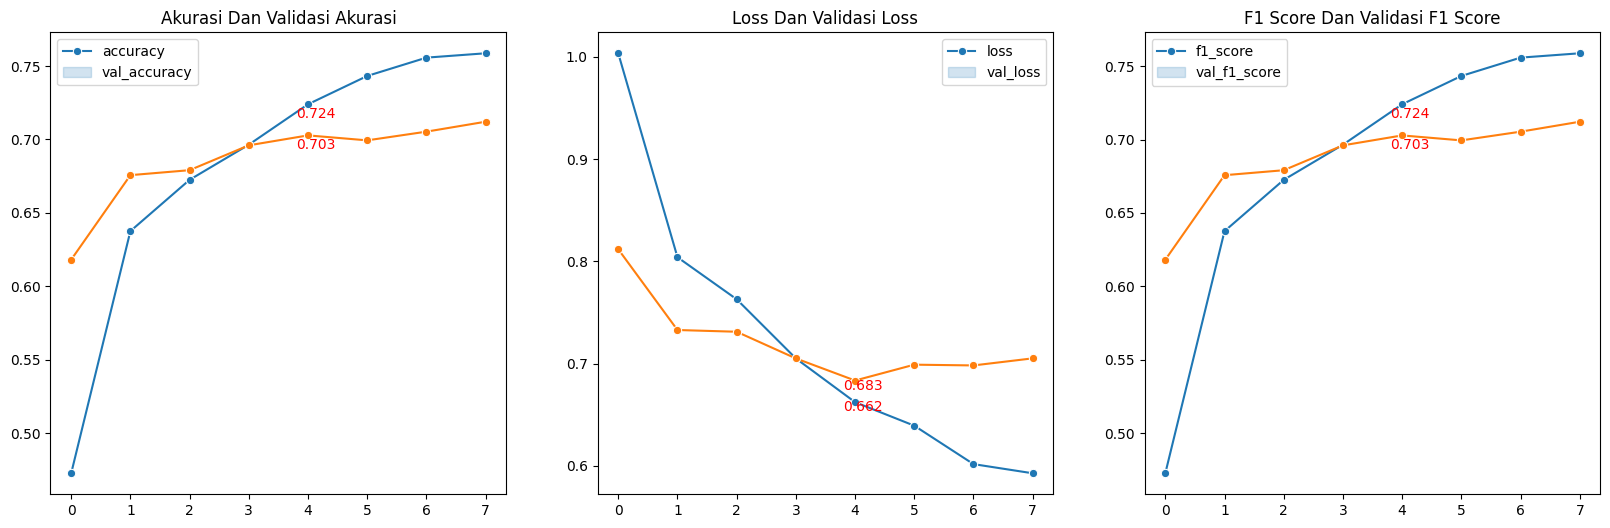

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
graph = ['accuracy', 'loss', 'f1_score']
title = ["Akurasi Dan Validasi Akurasi", "Loss Dan Validasi Loss", "F1 Score Dan Validasi F1 Score"]

def draw_graph(i, text, title):
    axes[i].set_title(title)
    fig = sns.lineplot(ax=axes[i], x=model_history.epoch, y=model_history.history[text], marker='o')
    fig = sns.lineplot(ax=axes[i], x=model_history.epoch, y=model_history.history[f'val_{text}'], marker='o')
    axes[i].legend([text, f'val_{text}'])

def text_graph(i, text):
    for j, (x, y) in enumerate(zip(model_history.epoch, model_history.history[f'{text}'])):
        if j == 4:
          axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red')

    for j, (x, y) in enumerate(zip(model_history.epoch, model_history.history[f'val_{text}'])):
        if j == 4:
          axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red')

for i, (val, tit) in enumerate(zip(graph, title)):
    draw_graph(i, val, tit)
    text_graph(i, val)


37/37 [==============================] - 1s 25ms/step


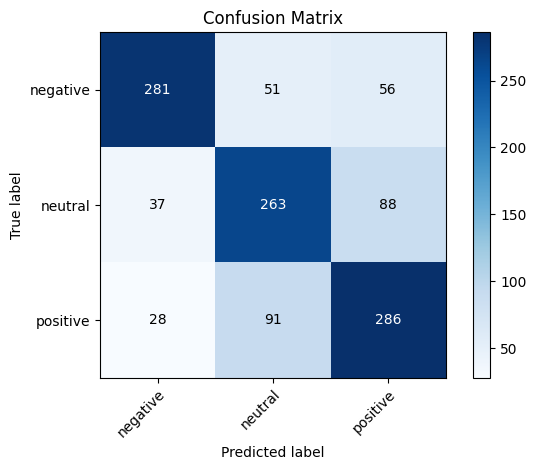

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels
class_labels = ['negative', 'neutral', 'positive']

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()








In [ ]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4721,)
(4721, 3)
(1181,)
(1181, 3)


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['negative', 'neutral', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.81      0.72      0.77       388
     neutral       0.65      0.68      0.66       388
    positive       0.67      0.71      0.69       405

    accuracy                           0.70      1181
   macro avg       0.71      0.70      0.70      1181
weighted avg       0.71      0.70      0.70      1181



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Contoh prediksi dan label sebenarnya (gunakan data Anda sendiri)
y_pred = np.random.randint(0, 3, size=(1181, 3))
y_test = np.random.randint(0, 3, size=(1181, 3))

# Mengubah prediksi dan label menjadi kelas yang diprediksi
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['negative', 'neutral', 'positive'], output_dict=True)

# Convert classification report to DataFrame
df_report = pd.DataFrame(report).transpose()

# Menyesuaikan format tabel
df_report['support'] = df_report['support'].astype(int)
df_report.loc['accuracy', ['precision', 'recall', 'f1-score']] = ''
df_report.loc['accuracy', 'support'] = df_report.loc['accuracy', 'support'].astype(int)

# Display the DataFrame in a more readable format
print(df_report.to_string())


             precision    recall  f1-score  support
negative      0.496753  0.510851  0.503704      599
neutral       0.314286   0.30137  0.307692      365
positive       0.15814  0.156682  0.157407      217
accuracy                                          0
macro avg     0.323059  0.322968  0.322934     1181
weighted avg  0.378142  0.381033  0.379495     1181
